# Workgroup 5

Authors: Valerie Dube, Erzo Garay, Juan Marcos Guerrero y Matias Villalba

## Replication and Data analysis

In [1]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Descriptives

#### 1.1. Descriptive table (vale)

In [2]:
# Import data and see first observations
df = pd.read_csv("../../data/processed_esti.csv")
df.head()

,y,w,gender_female,gender_male,gender_transgender,ethnicgrp_asian,ethnicgrp_black,ethnicgrp_mixed_multiple,ethnicgrp_other,ethnicgrp_white,partners1,postlaunch,msm,age,imd_decile
0,1,1,0,1,0,0,0,1,0,0,0,1,0,27,5
1,0,0,0,1,0,0,0,0,0,1,0,0,0,19,6
2,0,1,0,1,0,0,1,0,0,0,0,1,0,26,4
3,0,0,1,0,0,0,0,0,0,1,1,0,0,20,2
4,1,1,1,0,0,1,0,0,0,0,0,1,0,24,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   y                         1739 non-null   int64
 1   w                         1739 non-null   int64
 2   gender_female             1739 non-null   int64
 3   gender_male               1739 non-null   int64
 4   gender_transgender        1739 non-null   int64
 5   ethnicgrp_asian           1739 non-null   int64
 6   ethnicgrp_black           1739 non-null   int64
 7   ethnicgrp_mixed_multiple  1739 non-null   int64
 8   ethnicgrp_other           1739 non-null   int64
 9   ethnicgrp_white           1739 non-null   int64
 10  partners1                 1739 non-null   int64
 11  postlaunch                1739 non-null   int64
 12  msm                       1739 non-null   int64
 13  age                       1739 non-null   int64
 14  imd_decile                1739 non-null 

In [4]:
control = df[df['w'] == 0].drop('y', axis=1)
treatment = df[df['w'] == 1].drop('y', axis=1)

In [5]:
def get_descriptive_stats(group, column):
    if column == 'age':
        count = group[column].count()
    else:
        count = (group[column] == 1).sum()
    mean = group[column].mean()
    std = group[column].std()
    return count, mean, std

variables = df.columns.drop(['w', 'y'])
control_stats = {var: get_descriptive_stats(control, var) for var in variables}
treatment_stats = {var: get_descriptive_stats(treatment, var) for var in variables}

control_df = pd.DataFrame(control_stats, index=['count', 'mean', 'std']).T
treatment_df = pd.DataFrame(treatment_stats, index=['count', 'mean', 'std']).T

control_df.columns = pd.MultiIndex.from_product([['Control'], control_df.columns])
treatment_df.columns = pd.MultiIndex.from_product([['Treatment'], treatment_df.columns])

combined_df = pd.concat([control_df, treatment_df], axis=1)

In [6]:
formatted_table = combined_df[['Control', 'Treatment']].round(2)

print("Table 1: Descriptive Statistics and Balance\n")
print(formatted_table)

Table 1: Descriptive Statistics and Balance

                         Control              Treatment             
                           count   mean   std     count   mean   std
gender_female              475.0   0.58  0.49     541.0   0.59  0.49
gender_male                342.0   0.42  0.49     377.0   0.41  0.49
gender_transgender           1.0   0.00  0.03       3.0   0.00  0.06
ethnicgrp_asian             45.0   0.06  0.23      66.0   0.07  0.26
ethnicgrp_black             76.0   0.09  0.29      74.0   0.08  0.27
ethnicgrp_mixed_multiple    76.0   0.09  0.29      78.0   0.08  0.28
ethnicgrp_other             14.0   0.02  0.13       9.0   0.01  0.10
ethnicgrp_white            607.0   0.74  0.44     694.0   0.75  0.43
partners1                  239.0   0.29  0.46     277.0   0.30  0.46
postlaunch                 387.0   0.47  0.50     512.0   0.56  0.50
msm                        113.0   0.14  0.35     114.0   0.12  0.33
age                        818.0  23.05  3.59     921.0  2

The observations for each variable are generally balanced between the control and treatment groups. Additionally, most participants are white, with an average age of approximately 23. The mean IMD decile scores are around 3.5, indicating that participants in both groups tend to come from more deprived areas.

#### 1.2. Descriptive graphs (vale)

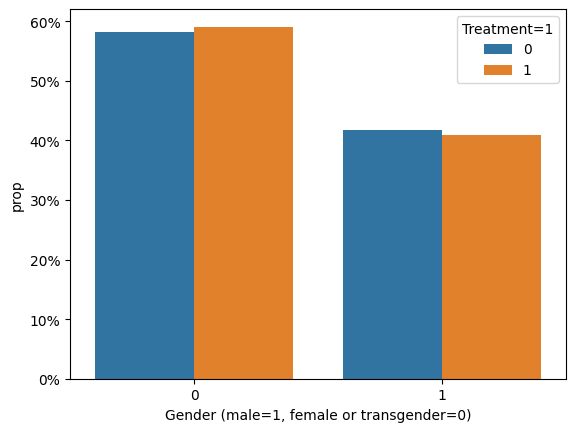

In [7]:
ax = sns.barplot(
    data=df.groupby('w')['gender_male'].value_counts(normalize=True).to_frame().set_axis(['prop'], axis=1),
    x="gender_male",
    y="prop",
    hue="w",
    )

ax.yaxis.set_major_formatter("{x:.0%}")
ax.set_xlabel("Gender (male=1, female or transgender=0)")
ax.legend(title='Treatment=1')

plt.show()

As we saw in section 1.1., there is a similar percentage of males and females per treatment group in the sample. 

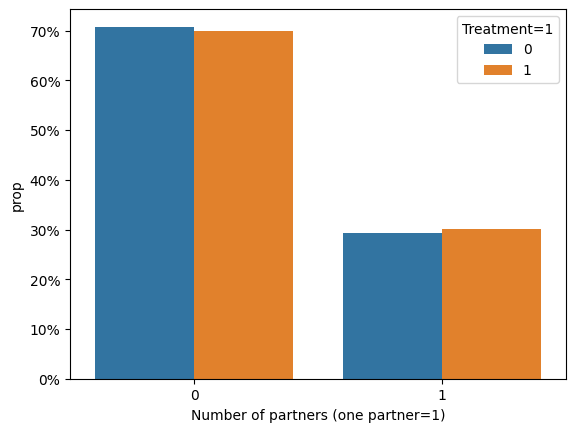

In [8]:
ax = sns.barplot(
    data=df.groupby('w')['partners1'].value_counts(normalize=True).to_frame().set_axis(['prop'], axis=1),
    x="partners1",
    y="prop",
    hue="w",
    )

ax.yaxis.set_major_formatter("{x:.0%}")
ax.set_xlabel("Number of partners (one partner=1)")
ax.legend(title='Treatment=1')

plt.show()

In a similar manner, we note an equal percentage of participants in the control and treatment groups, with 2 or more sexual partners as well as those with 1 sexual partner in the last 12 months from the beginning of the study.

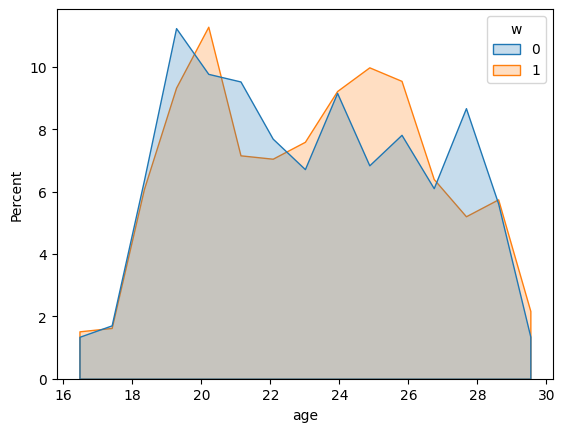

In [9]:
ax = sns.histplot(data=df, x="age", hue="w", element="poly", stat="percent", common_norm=False)

plt.show()

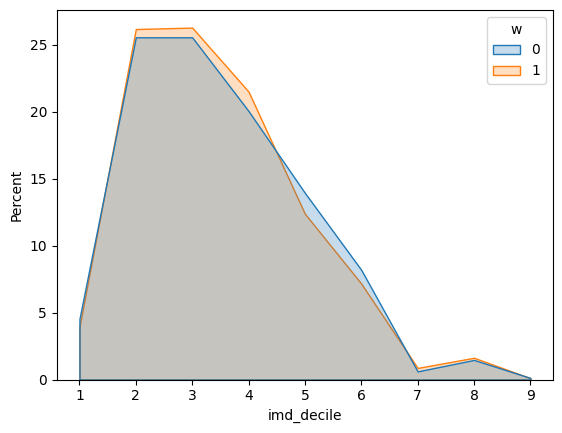

In [10]:
ax = sns.histplot(data=df, x="imd_decile", hue="w", element="poly", discrete=True, stat="percent", common_norm=False)

plt.show()

### 2. Linear Regression analysis

#### 2.1. Regression 1: $y = \beta_0 + \beta_1 T + \epsilon$   (Vale)

#### 2.2. Regression 2: $y = \beta_0 + \beta_1 T + \beta_2 X + \epsilon$  (vale)

#### 2.3.

#### 2.4.

### 3. Non-Linear Methods DML

#### 3.1.

#### 3.2.

#### 3.3.

#### 3.4.

#### 3.5.

#### 3.6.